In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

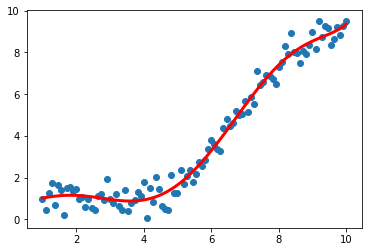

In [13]:
# fit a polynomial of order 6

poly_reg = PolynomialFeatures(degree=6)
x_poly = poly_reg.fit_transform(data_x)
poly_reg.fit(x_poly,data_y)
model = LinearRegression()
model.fit(x_poly,data_y)
plt.scatter(data_x,data_y)
plt.plot(data_x,model.predict(x_poly),color='red',linewidth=3)

In [16]:
#splitting into test and train data


xnew = np.power(data_x, range(7))
xnew = xnew/np.max(xnew, axis=0)
order=np.random.permutation(len(data_x))

train_x=xnew[order[30:]]
train_y=data_y[order[30:]]
test_x=xnew[order[:30]]
test_y=data_y[order[:30]]

In [26]:
# Implement gradient computation and theta update 

def gradient_descent(X, y, theta, alpha):
    for t in range(250):
        theta = theta - alpha*(1/train_x.shape[0])*(X.T@((X@theta)-y))
        return theta

In [28]:
theta1 = np.ones(7).reshape(7,1)
theta_pred = gradient_descent(train_x,train_y,theta1,0.1)
theta_pred

array([[1.10504184],
       [1.09226763],
       [1.07841872],
       [1.0663947 ],
       [1.05659508],
       [1.04875692],
       [1.04249932]])

In [37]:
# Call stochastic gradient descent in the main loop

m,n = train_x.shape
LR = 0.1
sample_size = 30
epochs = 500
costs = []
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace = False)
    x_sample = train_x[idx]
    y_sample = train_y[idx]
    y_hat = x_sample@theta1 - y_sample
    grad = (1/m)*x_sample.T @ y_hat
    theta1 = theta1 - LR*grad

In [38]:
theta1

array([[-0.14301608],
       [ 2.72300862],
       [ 3.47444465],
       [ 2.80384882],
       [ 1.67438897],
       [ 0.53356982],
       [-0.45942196]])

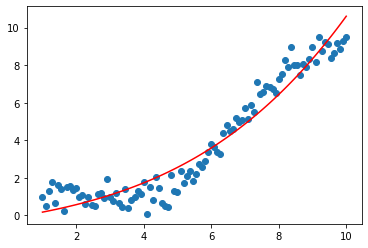

In [39]:
# predict y_hat using test_x and theta 

# plot x vs y in blue
# plot x vs y_hat in red

plt.scatter(data_x,data_y)
plt.plot(data_x,xnew@theta1,color="red")